In [22]:
import numpy as np
from get_border_cases import get_border_cases
import matplotlib as mpl
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
n = 17
N = n - 1
inner_n = n - 2
border_cases = get_border_cases(N)
params = np.ones(inner_n ** 2)

$$ E(p, 0.5) = p / 2 * (a + b) + (1 - p) * (c + d) / 2$$

In [24]:
def find_max(func, game):
    if func(0, game) >= func(1, game):
        v = func(0, game)
        p = 0
    else:
        v = func(1, game)
        p = 1
    return v, p

def get_win(p, game):
    return (p / 2) * (game[0, 0] + game[0, 1]) + (1 - p) / 2 * (game[1, 0] + game[1, 1])

'''
    Computes the value of a game.
    game is 2x2 matrix.
'''
def get_value(game):
    v, p = find_max(get_win, game)
    return v, p

'''
    Converts global index to inner index.
    index - index to convert.
    inner_n - inner dimension (without borders).
    global_n - outer dimension (with borders).
'''
def inner_n_to_global_N(index, inner_n, global_n):
    row = index // inner_n
    col = index % inner_n
    global_index = (row + 1) * global_n + (col + 1)
    return global_index

def global_N_to_inner_n(index, inner_n, global_n):
    row = index // global_n
    col = index % global_n

    if row < 1 or col < 1 or row > global_n - 2 or col > global_n - 2:
        raise ValueError("Index should match an inner node.")
    inner_index = (row - 1) * inner_n + (col - 1)
    return inner_index

# q == 0.5
def get_game(index, w):
    game = np.zeros((2, 2))
    game[0, 0] = compute_a11(index, w)
    game[0, 1] = compute_a12(index, w)
    game[1, 0] = compute_a21(index, w)
    game[1, 1] = compute_a22(index, w)
    return game

# Up
def compute_a11(index, w):
    if (index - n) in border_cases:
        a11 = 1
    else:
        a11 = w[global_N_to_inner_n(index - n, inner_n, n)] + 1
    return a11
    
# Down
def compute_a21(index, w):
    if (index + n) in border_cases:
        a12 = 1
    else:
        a12 = w[global_N_to_inner_n(index + n, inner_n, n)] + 1
    return a12

# Right
def compute_a12(index, w):
    if (index + 1) in border_cases:
        a21 = 1
    else:
        a21 = w[global_N_to_inner_n(index + 1, inner_n, n)] + 1
    return a21

# Left
def compute_a22(index, w):
    if (index - 1) in border_cases:
        a22 = 1
    else:
        a22 = w[global_N_to_inner_n(index - 1, inner_n, n)] + 1
    return a22
    

'''
    Number of values in w should match number of equations.
'''
def prepare_equations(w):
    eqs = np.zeros(len(w))
    p1s = []
    q1s = []
    for i in range(len(w)):
        index = inner_n_to_global_N(i, inner_n, n)
        game_mx = get_game(index, w)
        
        v, p1 = get_value(game_mx)
        q1 = 0.5

        p1s.append(p1)
        q1s.append(q1)
        eqs[i] = w[i] - v

    return tuple(eqs)

In [25]:
from scipy.optimize import fsolve

message = ""
while (message != "The solution converged."):
    starting_params = np.random.random(inner_n ** 2) * (inner_n - 2) ** 2
    w_new, _, _, message  = fsolve(prepare_equations, tuple(starting_params), full_output=True)
starting_params, message

(array([ 90.21020675,  41.85350071, 100.49344949, 113.17776332,
         26.35601679, 145.79140134,  83.70889057, 135.39089429,
         26.63448581,  72.75520208,  30.00653185, 100.28639356,
          8.98722064,  49.22747919, 160.94298774, 153.78992333,
         31.04530985, 127.22793578, 138.84937138, 166.37205467,
         16.78351148,  12.79910729, 111.2798846 , 156.40834804,
          9.33648591, 122.92005559,  17.16912831,  50.69825273,
        134.92568326,  90.49025978,  26.41122511,  82.55450921,
        138.85768503, 140.05536249, 120.29105967,  96.62469223,
         55.23825422,  55.22386532, 119.60052515,  49.03678586,
        111.98371772,  94.07580093,  66.68071709,  57.34044823,
        146.36696281,  53.38168467, 117.66192024, 105.89416419,
        153.57804925,  90.36865724, 164.04625729,  83.06286636,
        149.53341719,  82.18669212, 148.18924951,  34.0755446 ,
        108.79201966,  72.98501286,  66.03879347,  94.71768544,
         79.83535948,  59.52727003,  44.

In [26]:
starting_params[112]

16.601891194434277

In [27]:
(inner_n - 1) ** 2 * 0.68, w_new.reshape(inner_n, inner_n)[inner_n // 2, inner_n // 2]

(133.28, 225.00085749838317)

In [28]:
p1s = []
q1s = []
vs = []
for i in range(len(w_new)):
    index = inner_n_to_global_N(i, inner_n, n)
    game_mx = get_game(index, w_new)
    
    v, p1 = get_value(game_mx)
    q1 = 0.5

    p1s.append(p1)
    q1s.append(q1)
    vs.append(v)

Text(0.5, 1.0, 'Mean absorption time')

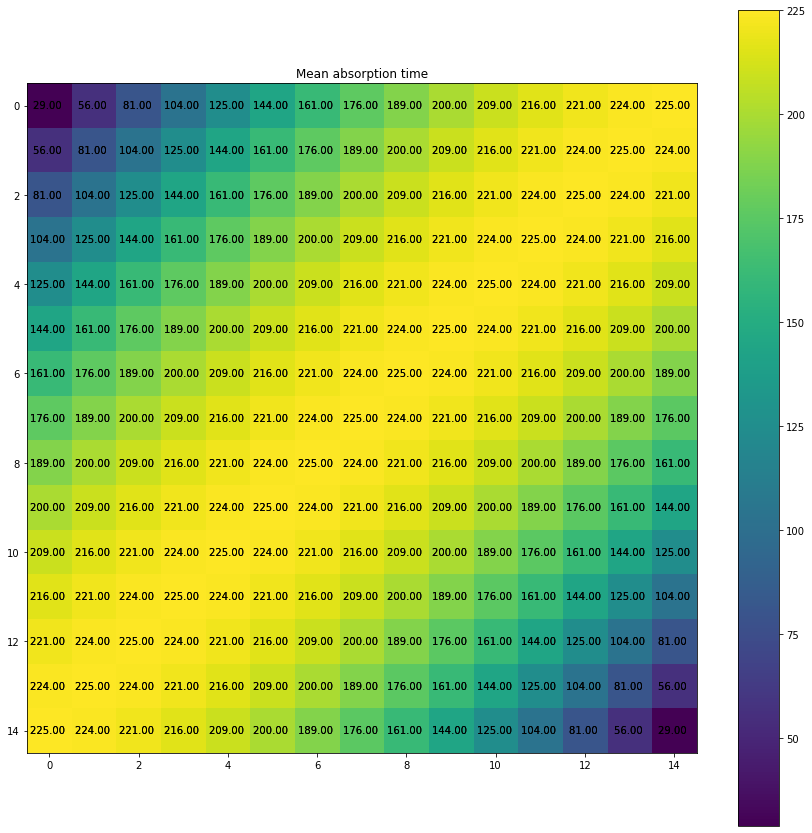

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
a = ax.imshow(np.reshape(vs, newshape=(inner_n, inner_n)))
fig.colorbar(a)
for (j, i), label in np.ndenumerate(np.reshape(vs, newshape=(inner_n, inner_n))):
    #print_str_1 = "↑→" if np.isclose(label, 1) else ""
    #print_str_2 = "↓←" if np.isclose(label, 0) else ""
    ax.text(i, j, f"{label:.2f} ", ha='center', va='center')
    ax.text(i, j, f"{label:.2f} ", ha='center', va='center')
    #print(label)
ax.set_title("Mean absorption time")

In [32]:
border_color_3 = np.array([204, 153, 255]) / 255.0
border_color_2 = np.array([178, 102, 255]) / 255.0
border_color_1 = np.array([141, 29, 255]) / 255.0
white_color = np.array([255, 255, 255]) / 255.0
center_color_1 = np.array([255, 202, 26]) / 255.0
center_color_2 = np.array([255, 219, 102]) / 255.0
center_color_3 = np.array([255, 231, 153]) / 255.0
rwgame_cmap = mcolors.LinearSegmentedColormap.from_list(
        'rwgame', [border_color_1, border_color_2, border_color_3, white_color, center_color_3, center_color_2, center_color_1])

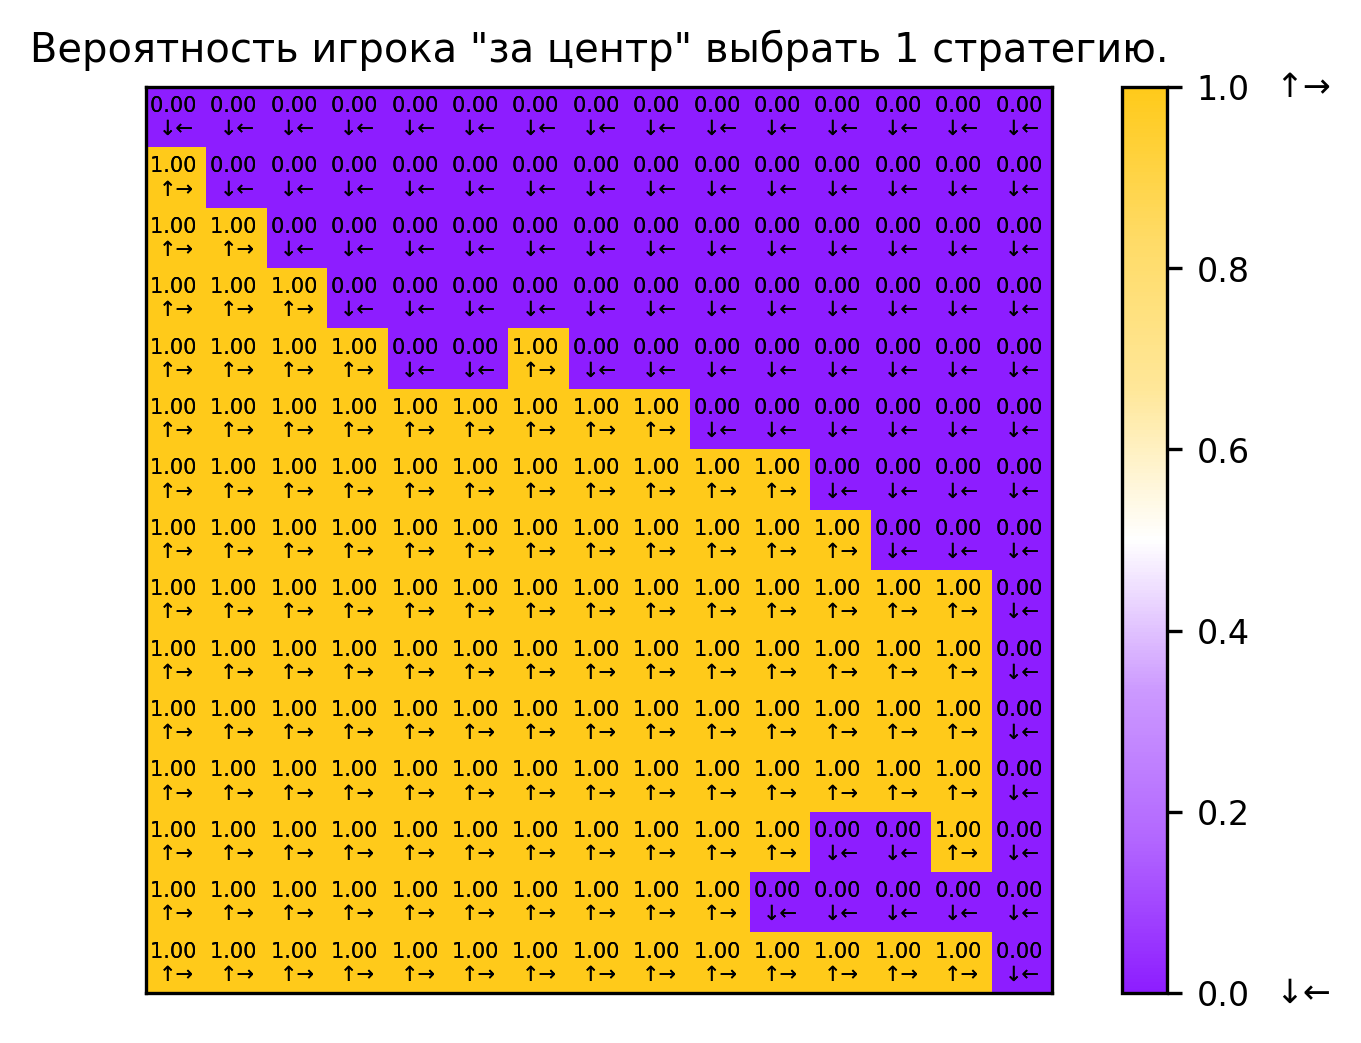

In [33]:
font = {'family' : 'normal',
        'size'   : 5}

mpl.rc('font', **font)

fig, ax = plt.subplots(1, 1, dpi=300)
ax.invert_yaxis()
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
a = ax.imshow(np.reshape(p1s, newshape=(inner_n, inner_n)), cmap=rwgame_cmap)
ax.plot()

for (j, i), label in np.ndenumerate(np.reshape(p1s, newshape=(inner_n, inner_n))):
    print_str_1 = "\n↑→" if np.isclose(label, 1) else ""
    print_str_2 = "\n↓←" if np.isclose(label, 0) else ""
    plt.text(i, j, f"{label:.2f} " + print_str_1 + print_str_2, ha='center', va='center')
    plt.text(i, j, f"{label:.2f} " + print_str_1 + print_str_2, ha='center', va='center')

font = {'family' : 'normal',
        'size'   : 8}
mpl.rc('font', **font)

cbar = fig.colorbar(a)
cbar.ax.text(4, 1, '↑→', ha='center', va='center')
cbar.ax.text(4, 0, '↓←', ha='center', va='center')

ax.set_title("Вероятность игрока \"за центр\" выбрать 1 стратегию.")
fig.savefig("G:\Studies\Masters\img\pvb_strategy.png")

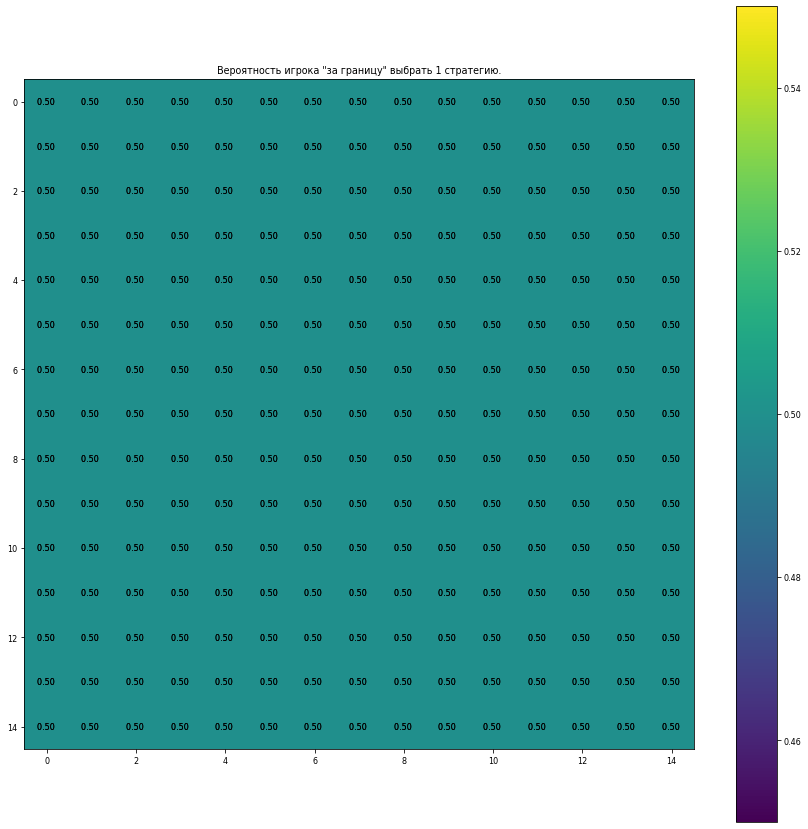

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(15, 15))
a = ax.imshow(np.reshape(q1s, newshape=(inner_n, inner_n)))
fig.colorbar(a)

for (j, i), label in np.ndenumerate(np.reshape(q1s, newshape=(inner_n, inner_n))):
    print_str_1 = "↑→" if np.isclose(label, 1) else ""
    print_str_2 = "↓←" if np.isclose(label, 0) else ""
    plt.text(i, j, f"{label:.2f} " + print_str_1 + print_str_2, ha='center', va='center')
    plt.text(i, j, f"{label:.2f} " + print_str_1 + print_str_2, ha='center', va='center')
ax.set_title("Вероятность игрока \"за границу\" выбрать 1 стратегию.")
fig.savefig("G:\Studies\Masters\img\pvb_2_strategy.png")
